### CovidNL
by Martien lubberink

This script shows the incidence of COVID cases in the Netherlands. It loads data from a JSON file from the Dutch health authority. Then is extrats data and presents in a graph.

In [1]:
"""
Created on Thu Jul 23 08:53:54 2020
@author: martien lubberink
"""
import json
import requests
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper definition for making pretty graph

def set_xmargin(ax, left=0.0, right=0.3):
    ax.set_xmargin(0)
    ax.autoscale_view()
    lim = ax.get_xlim()
    delta = np.diff(lim)
    left = lim[0] - delta*left
    right = lim[1] + delta*right
    ax.set_xlim(left,right)

In [3]:
#  Get the data, put it in a dataframe:

def get_the_data(fn):
    fh = requests.get(fn)
    json_data = fh.json()
    df = pd.json_normalize(json_data)
    df.rename(columns = dict(zip([x for x in list(df) if not(x.startswith('Municipality'))], [re.sub(r'_(.*)', r'', x) for x in list(df) if not(x.startswith('Municipality'))])), inplace=True)
    df['Date']= pd.to_datetime(df['Date'])
    df.set_index(['Date', 'Municipality_name'], inplace=True)
    df.dropna(inplace=True)
    return df

df = get_the_data("https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_cumulatief.json")
df.head()

Municipality_code   Province  Total  \
Date                Municipality_name                                       
2020-03-13 10:00:00 Appingedam                   GM0003  Groningen      0   
                    Delfzijl                     GM0010  Groningen      0   
                    Groningen                    GM0014  Groningen      3   
                    Loppersum                    GM0024  Groningen      0   
                    Almere                       GM0034  Flevoland      1   

                                       Hospital  Deceased  
Date                Municipality_name                      
2020-03-13 10:00:00 Appingedam                0         0  
                    Delfzijl                  0         0  
                    Groningen                 0         0  
                    Loppersum                 0         0  
                    Almere                    1         0

The next cell creates the graph. It shows COVID-19 stats from July 2020 onward, for The Netherlands.

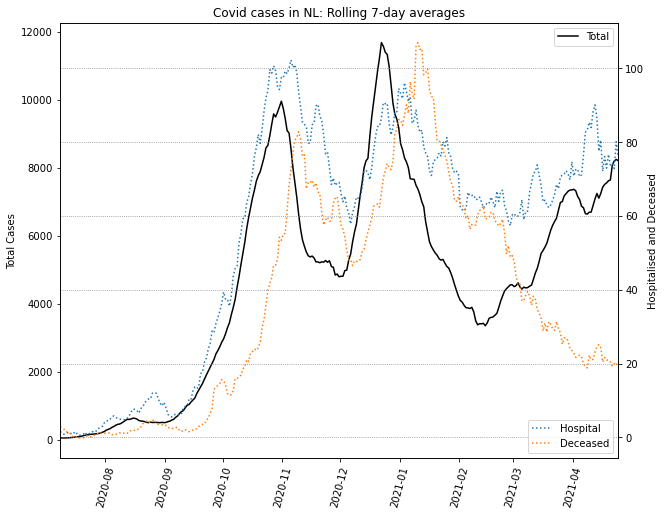

In [5]:
# Make that graph:

def make_graph(df, t):
    dff = pd.DataFrame()
    for i in ['Total', 'Hospital', 'Deceased']:
        dft = df[i].unstack().copy().sum(axis=1)
        dft.name = i
        dff = dff.join(dft, how = "right")
    fig = plt.figure(figsize=(10,8))
    fig.tight_layout()
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    ax.plot(dff[t:]['Total'].diff().rolling(7).mean(), 'k-')
    ax2.plot(dff[t:][['Hospital', 'Deceased']].diff().rolling(7).mean(), linestyle= 'dotted')
    ax.legend(list(dff))
    ax2.legend(list(dff)[1:], loc = 'lower right')
    ax.set_ylabel('Total Cases', color='k')
    ax2.set_ylabel('Hospitalised and Deceased', color='k')
    plt.grid(linestyle="dotted", color='grey')
    plt.title('Covid cases in NL: Rolling 7-day averages')
    set_xmargin(ax, left=0, right=0)
    ax.tick_params(axis='x', labelrotation=75)
    plt.plot()
    return(dff)

df = make_graph(df, '2020-07')

In [6]:
df.tail()

,Total,Hospital,Deceased
Date,,,
2021-04-20 10:00:00,1412482.0,27775.0,16930.0
2021-04-21 10:00:00,1420909.0,27854.0,16948.0
2021-04-22 10:00:00,1430438.0,27934.0,16967.0
2021-04-23 10:00:00,1439617.0,28032.0,16981.0
2021-04-24 10:00:00,1447635.0,28088.0,17003.0
